# Ford-Go-Bike Trip Dataset Exploration

## by Gift Omodu


## Investigation Overview


> On the presentation, I chose to focus on ride performance by gender. Seeing how many riders turned out in the event and the type of customers they were.
> I paired each bike id with the corresponding ride duration. Gradually, several patterns sprung up when compared to gender, user types and if the rides were shared.



## Dataset Overview
The data consist of 174,952 entries from a bike ride. Several observations were seen from the data. Some of them were duration of ride, start time, user types, member gender

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
fgb = pd.read_csv('ford_bike_clean_data.csv')

fgb['start_time']=pd.to_datetime(fgb['start_time'])
fgb['end_time'] = pd.to_datetime(fgb['end_time'])

## Distribution of Ride Duration

The distribution of the duration of ride on a log scale revealed that the data was unimodal and skewed to the right.


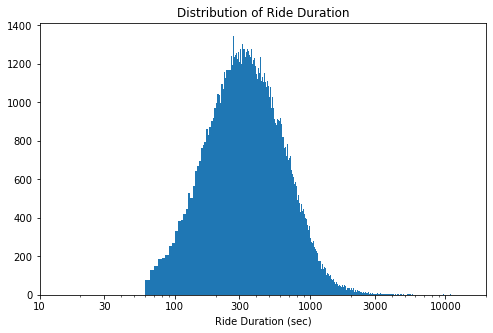

In [4]:

bins = np.arange(0, fgb['duration_sec'].max()+10, 5)

ticks=[10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=[8, 5])
plt.hist(data = fgb, x = 'duration_sec', bins = bins)
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (sec)')
plt.xscale('log')
plt.xlim(50, 20000)
plt.xticks(ticks, ticks);

## Distribution of Birth Year

The spread on the birth year revealed that we had more individuals born after 1980 participating in the ride event. This later dropped in size as the data approached 2000.

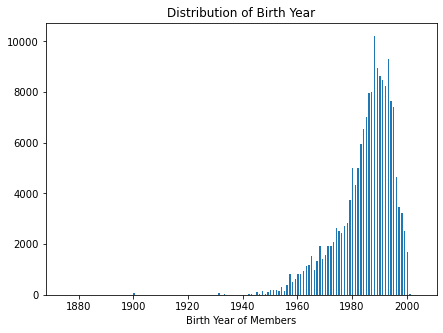

In [5]:

plt.figure(figsize= [7,5])
bins= np.arange(0, fgb['member_birth_year'].max()+50,0.5)
plt.hist(data = fgb, x = 'member_birth_year', bins=bins)
plt.title('Distribution of Birth Year')
plt.xlabel('Birth Year of Members')
plt.xlim(fgb['member_birth_year'].min()-10, fgb['member_birth_year'].max()+10);

## Weekly ride count by gender
A plot of the weekly ride count by gender shows a consistent rise and fall in participant. It was noticeable that we had more riders on the 8th week with the male dominating the gender class in numbers.  

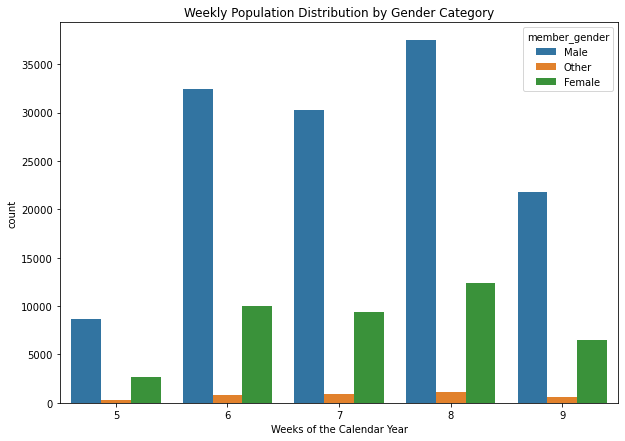

In [6]:
# Grouping by week
per_wk = fgb['start_time'].dt.isocalendar().week

plt.figure(figsize=[10,7])
sb.countplot(data= fgb, x=per_wk, hue='member_gender')
plt.xlabel('Weeks of the Calendar Year')
plt.title('Weekly Population Distribution by Gender Category');

## Ride Duration by bike ids and user type

The plot shows that there were more subscribers than customers in the race.

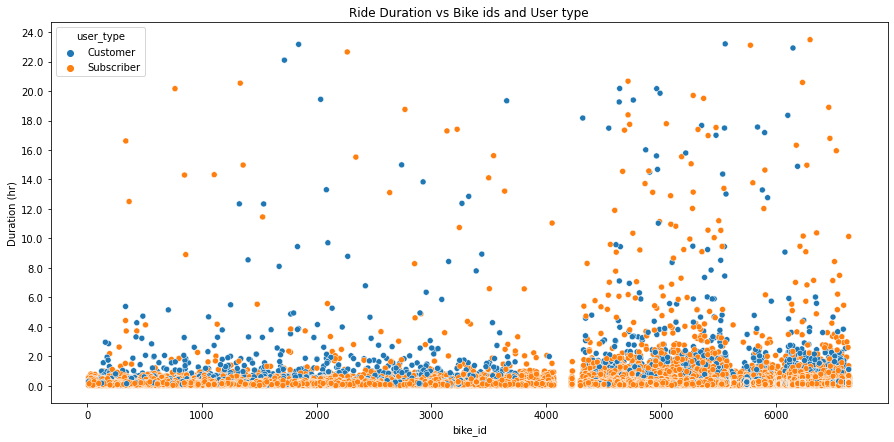

In [7]:
#Convert ride duration from seconds to hours
duration_hr= fgb['duration_sec']/3600


plt.figure(figsize=[15, 7])
ticks= np.arange(0, duration_hr.max()+2, 2)
sb.scatterplot(data= fgb, x='bike_id', y=duration_hr, hue= 'user_type')
plt.title('Ride Duration vs Bike ids and User type')
plt.ylabel('Duration (hr)')
plt.yticks(ticks, ticks);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt